In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif # classification
from sklearn.feature_selection import f_regression, mutual_info_regression # regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
import pandas as pd

In [4]:
df = pd.read_csv("dataset_N2N.csv", sep=",", header=0)
df.head()

,x_s,time_s,Temp,X1,X2,X3,X4,X5,X6,X7,...,RVV38,RVV39,RVV40,RVV41,RVV42,RVV43,RVV44,RVV45,RVV46,RVV47
0,0.000000,0.000000e+00,10757.166,0.999986,0.000014,2.397178e-10,4.558197e-15,9.939829e-20,2.485752e-24,7.129016e-29,...,-2.401320e-109,-5.311691e-112,-1.346084e-114,-3.908330e-117,-1.300201e-119,-4.956191e-122,-2.164807e-124,-1.083521e-126,-6.214598e-129,-4.115686e-131
1,0.000004,8.216688e-12,10757.146,0.999963,0.000037,1.815259e-09,1.240808e-13,1.154856e-17,1.419631e-21,2.233567e-25,...,4.313327e+01,4.319762e+01,4.302709e+01,4.261090e+01,4.193997e+01,4.100697e+01,3.980402e+01,3.819891e+01,3.036801e+01,-1.093747e+03
2,0.000008,1.643338e-11,10757.126,0.999941,0.000059,4.418282e-09,4.266114e-13,5.241519e-17,8.059130e-21,1.524676e-24,...,2.222941e+02,2.225802e+02,2.216414e+02,2.194194e+02,2.158637e+02,2.109328e+02,2.045732e+02,1.958232e+02,1.487166e+02,-5.628267e+03
3,0.000012,2.465006e-11,10757.106,0.999919,0.000081,8.070145e-09,9.922813e-13,1.496790e-16,2.742066e-20,6.035964e-24,...,6.379328e+02,6.386028e+02,6.357109e+02,6.290790e+02,6.185514e+02,6.039950e+02,5.852063e+02,5.583745e+02,4.014412e+02,-1.612388e+04
4,0.000029,6.058392e-11,10757.020,0.999822,0.000178,3.553516e-08,8.802196e-12,2.765142e-15,1.098811e-18,5.460371e-22,...,8.370745e+03,8.365424e+03,8.308980e+03,8.198153e+03,8.029840e+03,7.800562e+03,7.495944e+03,6.918945e+03,3.138381e+03,-2.091199e+05


In [23]:
X = df.iloc[:,0:53].values    # x_s, time_s, Temp, ni_n, na_n, rho, v, p, E, H
y = df.iloc[:,53:54].values

In [18]:
feature_names = ["x_s","time_s", "Temp"] + [f"X{i}" for i in range(1, 48)] + ["rho", "v","p"] + [f"RDm{i}" for i in range(1, 47)] + [f"RDa{i}" for i in range(1, 47)] + [f"RVTm{i}" for i in range(1, 47)] + [f"RVTa{i}" for i in range(1, 47)] + [f"RVV{i}" for i in range(1, 47)]

In [19]:
list1 = list(feature_names)

In [24]:
y.shape


(1936, 1)

In [25]:
f_new, _ = f_regression(X, y.ravel())
f_new /= np.max(f_new)
print(f_new)

[2.65118852e-13 2.65118852e-13 9.62546712e-11 8.90607030e-13
 5.35254943e-14 1.52456752e-13 1.26405505e-13 8.16130705e-14
 4.63487981e-14 2.31738071e-14 9.53540168e-15 2.59102016e-15
 1.19789896e-16 5.40604689e-16 2.76552715e-15 6.05726684e-15
 9.92088149e-15 1.40272708e-14 1.81604698e-14 2.21815948e-14
 2.60041717e-14 2.95771806e-14 3.28733563e-14 3.58810615e-14
 3.85986091e-14 4.10302768e-14 4.31834683e-14 4.50666658e-14
 4.66878991e-14 4.80535286e-14 4.91671777e-14 5.00286630e-14
 5.06327706e-14 5.09677025e-14 5.10129801e-14 5.07365164e-14
 5.00904781e-14 4.90054170e-14 4.73820297e-14 4.50799300e-14
 4.19035080e-14 3.75879679e-14 3.17992486e-14 2.41968365e-14
 1.47247664e-14 4.67734053e-15 2.51265059e-16 2.25260721e-14
 1.17899696e-13 2.67428615e-13 4.43936364e-12 3.75974221e-11
 1.00000000e+00]


In [27]:
mi_new = mutual_info_regression(X, y.ravel())
mi_new /= np.max(mi_new)
print(mi_new)

[0.23102069 0.23102853 0.92018993 0.82564057 0.88093188 0.92546109
 0.88413386 0.77760618 0.52803927 0.7270043  0.76241207 0.77390515
 0.77856736 0.77906084 0.78097467 0.79423098 0.7988002  0.80090113
 0.79939114 0.80050796 0.80360483 0.80411216 0.80108558 0.80139124
 0.80209872 0.79825594 0.79905311 0.79817374 0.7980712  0.7985513
 0.79561153 0.79252553 0.79207792 0.79891891 0.79831768 0.79655768
 0.79754209 0.79328778 0.78974418 0.77385113 0.7838675  0.81300559
 0.8338145  0.84487657 0.85395498 0.85526315 0.84438253 0.83370678
 0.8219865  0.81531317 0.88059927 0.92121025 1.        ]


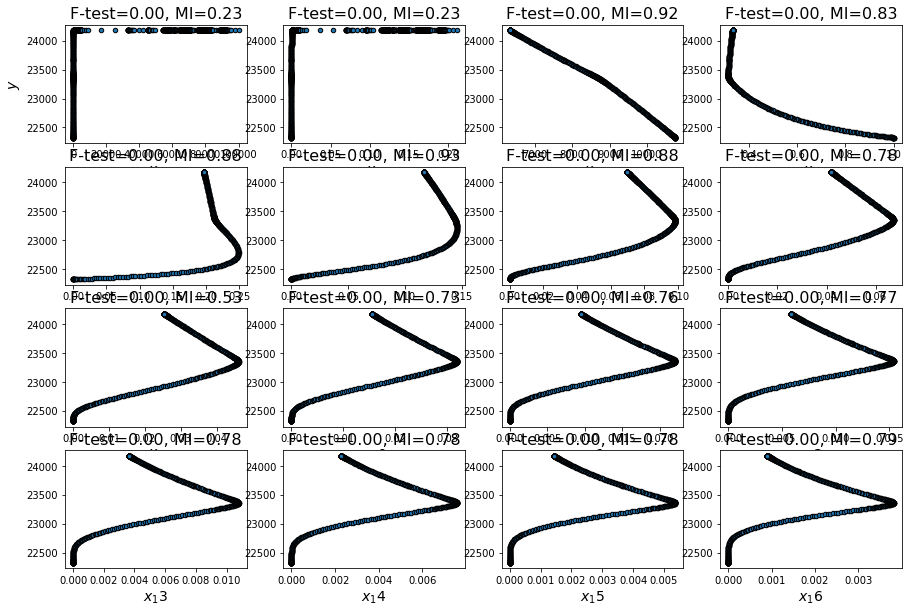

In [29]:
plt.figure(figsize=(15, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.scatter(X[:, i], y, edgecolor="black", s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_new[i], mi_new[i]), fontsize=16)
plt.show()
